<a href="https://colab.research.google.com/github/Valmir-unicap/Projeto-Processamento-Digital-Imagens/blob/main/Solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy

In [ ]:
pip install opencv-python

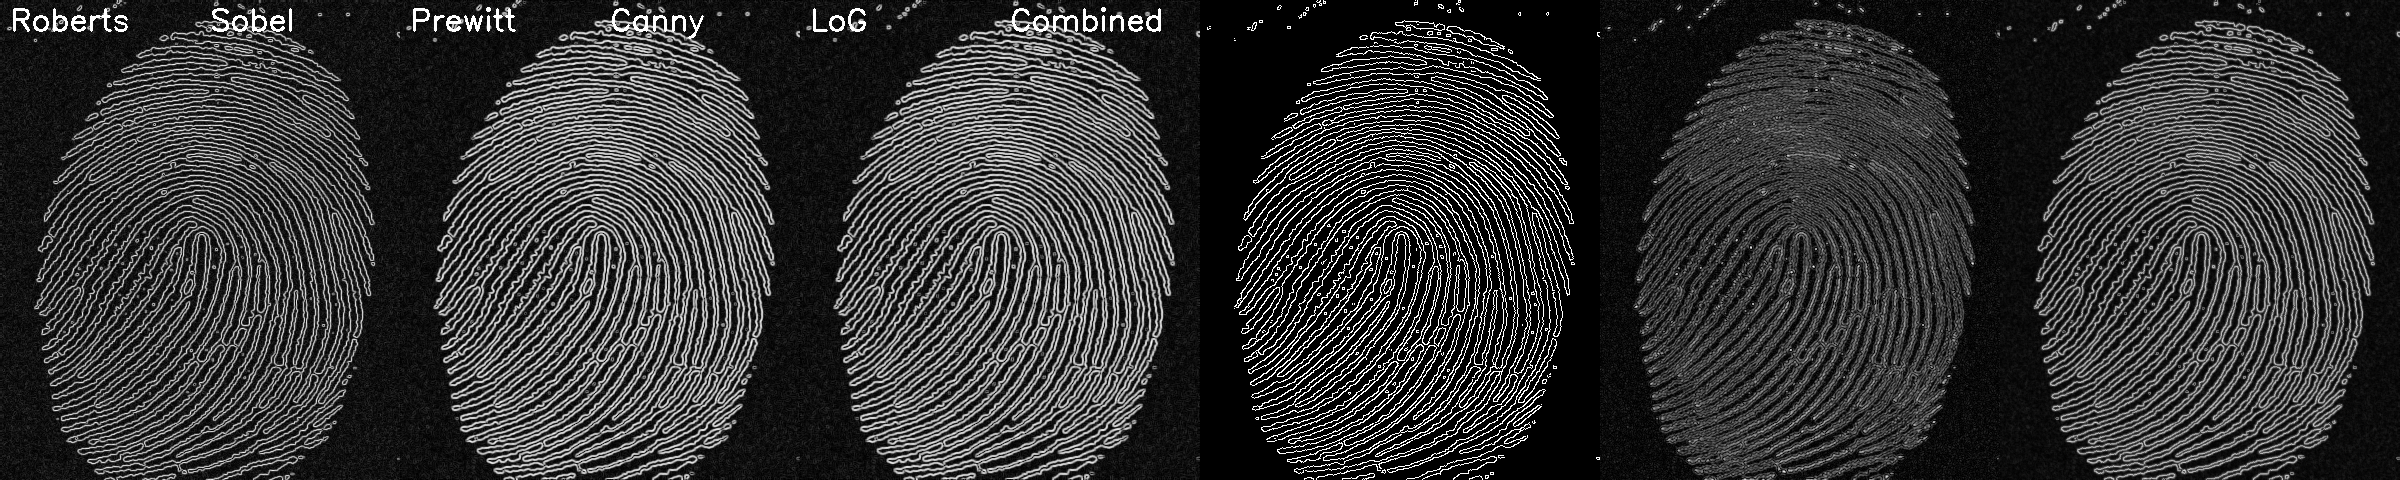

In [18]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def roberts_edge_detection(image):
    image = image.astype(np.float32)
    kernel_roberts_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
    kernel_roberts_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

    edge_x = cv2.filter2D(image, -1, kernel_roberts_x)
    edge_y = cv2.filter2D(image, -1, kernel_roberts_y)

    return cv2.sqrt(cv2.addWeighted(cv2.pow(edge_x, 2.0), 1.0, cv2.pow(edge_y, 2.0), 1.0, 0.0))

def sobel_edge_detection(image):
    image = image.astype(np.float32)
    edge_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    edge_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    return cv2.sqrt(cv2.addWeighted(cv2.pow(edge_x, 2.0), 1.0, cv2.pow(edge_y, 2.0), 1.0, 0.0))

def prewitt_edge_detection(image):
    image = image.astype(np.float32)
    kernel_prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)
    kernel_prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)

    edge_x = cv2.filter2D(image, -1, kernel_prewitt_x)
    edge_y = cv2.filter2D(image, -1, kernel_prewitt_y)

    return cv2.sqrt(cv2.addWeighted(cv2.pow(edge_x, 2.0), 1.0, cv2.pow(edge_y, 2.0), 1.0, 0.0))

def canny_edge_detection(image):
    return cv2.Canny(image, 100, 200)

def log_edge_detection(image):
    image_blur = cv2.GaussianBlur(image, (3, 3), 0)
    lap = cv2.Laplacian(image_blur, cv2.CV_64F)
    return np.uint8(np.absolute(lap))

def combine_edge_detection(image):
    roberts = roberts_edge_detection(image)
    sobel = sobel_edge_detection(image)
    prewitt = prewitt_edge_detection(image)
    canny = canny_edge_detection(image)
    log = log_edge_detection(image)

    # Normalizar para combinar (0-255)
    roberts_norm = cv2.normalize(roberts, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    sobel_norm = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    prewitt_norm = cv2.normalize(prewitt, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    log_norm = cv2.normalize(log, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Combinar todas as bordas (usando soma ponderada ou média)
    combined = cv2.addWeighted(roberts_norm, 0.2, sobel_norm, 0.2, 0)
    combined = cv2.addWeighted(combined, 1, prewitt_norm, 0.2, 0)
    combined = cv2.addWeighted(combined, 1, log_norm, 0.2, 0)
    combined = cv2.addWeighted(combined, 1, canny.astype(np.uint8), 0.2, 0)

    return combined

def display_comparison(roberts, sobel, prewitt, canny, log, combined):
    # Criar uma imagem para exibir todas as bordas
    comparison = np.hstack((roberts, sobel, prewitt, canny, log, combined))

    # Adicionar rótulos para cada técnica
    titles = ['Roberts', 'Sobel', 'Prewitt', 'Canny', 'LoG', 'Combined']
    for i, title in enumerate(titles):
        cv2.putText(comparison, title, (i * 200 + 10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    cv2_imshow(comparison)

def main():
    image_path = '/content/digital.jpg'  # Update com o caminho correto da imagem
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Error: Could not load image from {image_path}. Please check the file path and ensure the image exists.")
        return

    # Aplicar a detecção de bordas combinada
    roberts = roberts_edge_detection(image)
    sobel = sobel_edge_detection(image)
    prewitt = prewitt_edge_detection(image)
    canny = canny_edge_detection(image)
    log = log_edge_detection(image)
    combined_edges = combine_edge_detection(image)

    # Normalizar para exibição
    roberts_norm = cv2.normalize(roberts, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    sobel_norm = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    prewitt_norm = cv2.normalize(prewitt, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    canny_norm = canny.astype(np.uint8)
    log_norm = cv2.normalize(log, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Exibir comparação
    display_comparison(roberts_norm, sobel_norm, prewitt_norm, canny_norm, log_norm, combined_edges)

    # Salvar o resultado combinado
    cv2.imwrite('imagem_combinada.jpg', combined_edges)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()

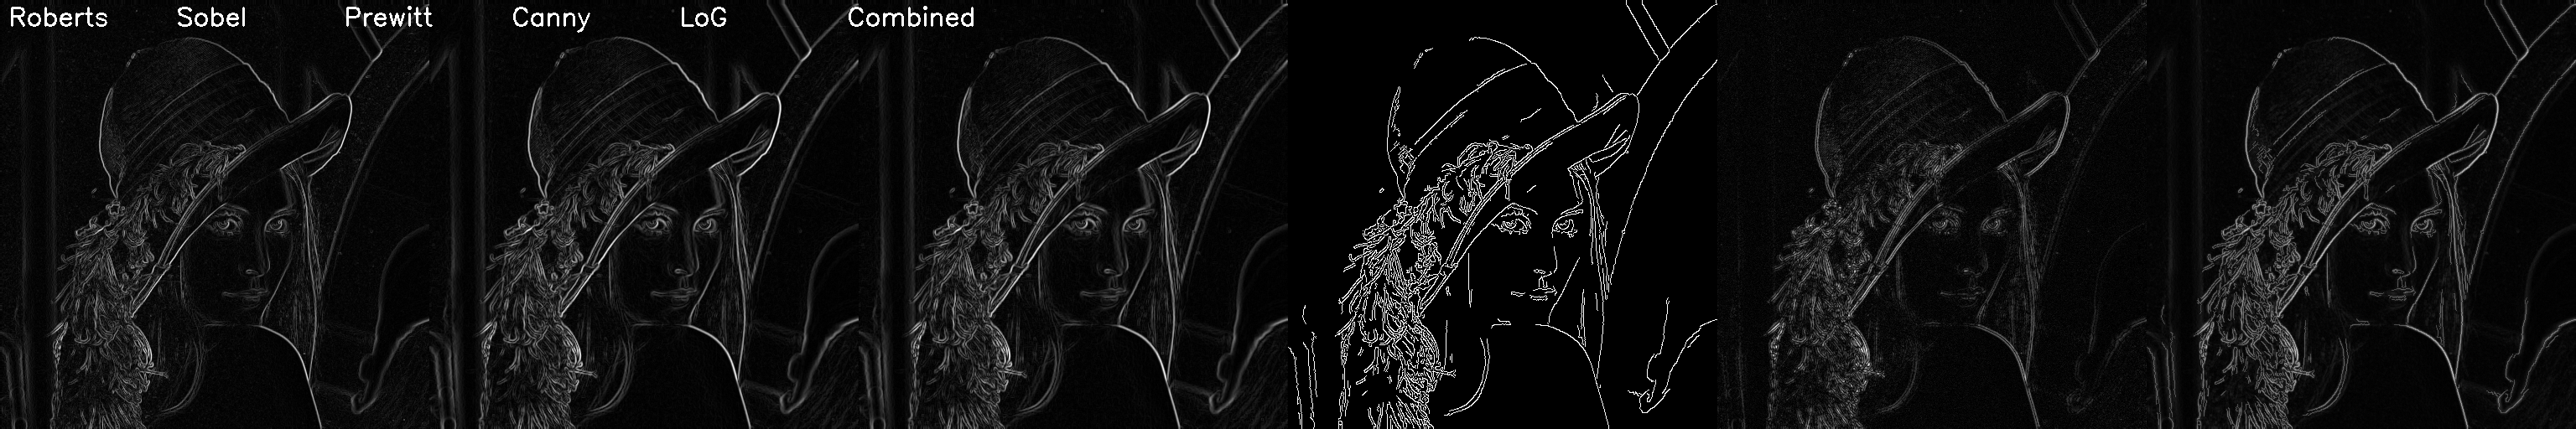

In [17]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def roberts_edge_detection(image):
    image = image.astype(np.float32)
    kernel_roberts_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
    kernel_roberts_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

    edge_x = cv2.filter2D(image, -1, kernel_roberts_x)
    edge_y = cv2.filter2D(image, -1, kernel_roberts_y)

    return cv2.sqrt(cv2.addWeighted(cv2.pow(edge_x, 2.0), 1.0, cv2.pow(edge_y, 2.0), 1.0, 0.0))

def sobel_edge_detection(image):
    image = image.astype(np.float32)
    edge_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    edge_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    return cv2.sqrt(cv2.addWeighted(cv2.pow(edge_x, 2.0), 1.0, cv2.pow(edge_y, 2.0), 1.0, 0.0))

def prewitt_edge_detection(image):
    image = image.astype(np.float32)
    kernel_prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)
    kernel_prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)

    edge_x = cv2.filter2D(image, -1, kernel_prewitt_x)
    edge_y = cv2.filter2D(image, -1, kernel_prewitt_y)

    return cv2.sqrt(cv2.addWeighted(cv2.pow(edge_x, 2.0), 1.0, cv2.pow(edge_y, 2.0), 1.0, 0.0))

def canny_edge_detection(image):
    return cv2.Canny(image, 100, 200)

def log_edge_detection(image):
    image_blur = cv2.GaussianBlur(image, (3, 3), 0)
    cv2.Laplacian(image_blur, cv2.CV_64F)
    return np.uint8(np.absolute(lap))

def combine_edge_detection(image):
    roberts = roberts_edge_detection(image)
    sobel = sobel_edge_detection(image)
    prewitt = prewitt_edge_detection(image)
    canny = canny_edge_detection(image)
    log = log_edge_detection(image)

    # Normalizar para combinar (0-255)
    roberts_norm = cv2.normalize(roberts, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    sobel_norm = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    prewitt_norm = cv2.normalize(prewitt, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    log_norm = cv2.normalize(log, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Combinar todas as bordas (usando soma ponderada ou média)
    combined = cv2.addWeighted(roberts_norm, 0.2, sobel_norm, 0.2, 0)
    combined = cv2.addWeighted(combined, 1, prewitt_norm, 0.2, 0)
    combined = cv2.addWeighted(combined, 1, log_norm, 0.2, 0)
    combined = cv2.addWeighted(combined, 1, canny.astype(np.uint8), 0.2, 0)

    return combined

def display_comparison(roberts, sobel, prewitt, canny, log, combined):
    # Criar uma imagem para exibir todas as bordas
    comparison = np.hstack((roberts, sobel, prewitt, canny, log, combined))

    # Adicionar rótulos para cada técnica
    titles = ['Roberts', 'Sobel', 'Prewitt', 'Canny', 'LoG', 'Combined']
    for i, title in enumerate(titles):
        cv2.putText(comparison, title, (i * 200 + 10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    cv2_imshow(comparison)

def main():
    image_path = '/content/lena.png'  # Update com o caminho correto da imagem
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Error: Could not load image from {image_path}. Please check the file path and ensure the image exists.")
        return

    # Aplicar a detecção de bordas combinada
    roberts = roberts_edge_detection(image)
    sobel = sobel_edge_detection(image)
    prewitt = prewitt_edge_detection(image)
    canny = canny_edge_detection(image)
    log = log_edge_detection(image)
    combined_edges = combine_edge_detection(image)

    # Normalizar para exibição
    roberts_norm = cv2.normalize(roberts, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    sobel_norm = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    prewitt_norm = cv2.normalize(prewitt, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    canny_norm = canny.astype(np.uint8)
    log_norm = cv2.normalize(log, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Exibir comparação
    display_comparison(roberts_norm, sobel_norm, prewitt_norm, canny_norm, log_norm, combined_edges)

    # Salvar o resultado combinado
    cv2.imwrite('imagem_combinada.jpg', combined_edges)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()

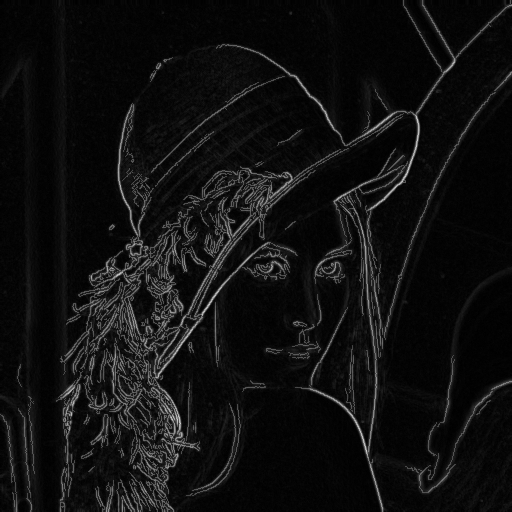

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def roberts_edge_detection(image):
    image = image.astype(np.float32)
    kernel_roberts_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
    kernel_roberts_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

    edge_x = cv2.filter2D(image, -1, kernel_roberts_x)
    edge_y = cv2.filter2D(image, -1, kernel_roberts_y)

    return cv2.sqrt(cv2.addWeighted(cv2.pow(edge_x, 2.0), 1.0, cv2.pow(edge_y, 2.0), 1.0, 0.0))

def sobel_edge_detection(image):
    image = image.astype(np.float32)
    edge_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    edge_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    return cv2.sqrt(cv2.addWeighted(cv2.pow(edge_x, 2.0), 1.0, cv2.pow(edge_y, 2.0), 1.0, 0.0))

def prewitt_edge_detection(image):
    image = image.astype(np.float32)
    kernel_prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)
    kernel_prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)

    edge_x = cv2.filter2D(image, -1, kernel_prewitt_x)
    edge_y = cv2.filter2D(image, -1, kernel_prewitt_y)

    return cv2.sqrt(cv2.addWeighted(cv2.pow(edge_x, 2.0), 1.0, cv2.pow(edge_y, 2.0), 1.0, 0.0))

def canny_edge_detection(image):
    return cv2.Canny(image, 100, 200)

def log_edge_detection(image):
    image_blur = cv2.GaussianBlur(image, (3, 3), 0)
    cv2.Laplacian(image_blur, cv2.CV_64F)
    return np.uint8(np.absolute(lap))

def combine_edge_detection(image):
    roberts = roberts_edge_detection(image)
    sobel = sobel_edge_detection(image)
    prewitt = prewitt_edge_detection(image)
    canny = canny_edge_detection(image)
    log = log_edge_detection(image)

    # Normalizar para combinar (0-255)
    roberts_norm = cv2.normalize(roberts, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    sobel_norm = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    prewitt_norm = cv2.normalize(prewitt, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    log_norm = cv2.normalize(log, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Combinar todas as bordas (usando soma ponderada ou média)
    combined = cv2.addWeighted(roberts_norm, 0.2, sobel_norm, 0.2, 0)
    combined = cv2.addWeighted(combined, 1, prewitt_norm, 0.2, 0)
    combined = cv2.addWeighted(combined, 1, log_norm, 0.2, 0)
    combined = cv2.addWeighted(combined, 1, canny.astype(np.uint8), 0.2, 0)

    return combined

def main():
    image_path = '/content/lena.png'  # Update com o caminho correto da imagem
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Error: Could not load image from {image_path}. Please check the file path and ensure the image exists.")
        return

    # Aplicar a detecção de bordas combinada
    combined_edges = combine_edge_detection(image)

    # Salvar e exibir o resultado
    cv2.imwrite('imagem_combinada.jpg', combined_edges)
    cv2_imshow(combined_edges)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()